In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer


train_df = pd.read_csv("adult_train.csv")
test_df = pd.read_csv("adult_test.csv")

### Task 1

Step 1

In [3]:
y_train = train_df.target
x_train = train_df.drop("target", axis=1)

y_test = test_df.target
x_test = test_df.drop("target", axis=1)

Step 2

In [4]:
x_train_dicts = x_train.to_dict("records")
x_test_dicts = x_test.to_dict("records")



dv = DictVectorizer()
x_train_encoded = dv.fit_transform(x_train_dicts)
x_test_encoded = dv.transform(x_test_dicts)


In [5]:
clf_forest = RandomForestClassifier()
train_scores = cross_val_score(clf_forest, x_train_encoded, y_train)

Step 3

In [6]:
pipeline = make_pipeline(
  DictVectorizer(),
  RandomForestClassifier()
)

In [7]:
pipeline.fit(x_train_dicts, y_train)
train_preds = pipeline.predict(x_train_dicts)
accuracy_score(y_train, train_preds)

0.9763213660514112

### Task 2

In [8]:
clf_scores = []

# Test a range of max depth
for i in range(1, 20):
    clf_model = DecisionTreeClassifier(max_depth=i)
    clf_model.fit(x_train_encoded, y_train)
    train_score = accuracy_score(y_train, clf_model.predict(x_train_encoded))
    test_score = accuracy_score(y_test, clf_model.predict(x_test_encoded))
    clf_scores.append((train_score, test_score))


Underfitting and overfitting

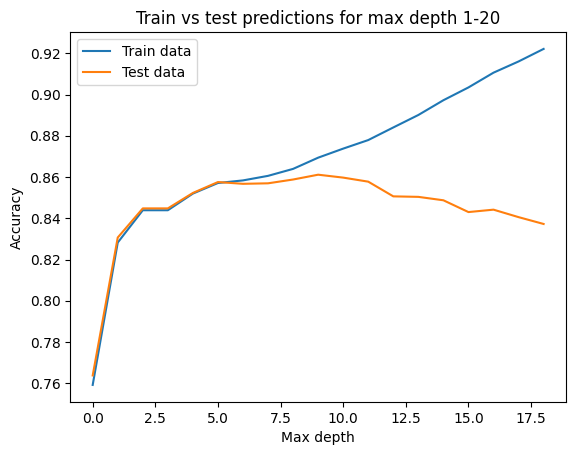

In [9]:
plt.plot(clf_scores)
plt.legend(["Train data", "Test data"])
plt.title("Train vs test predictions for max depth 1-20")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.show()

The effects of increasing max depth is similar to the task in A1 where both the test and train accuracy increased together until the depth of six whereupon the model became overfitted. But not as drastic as the regression model which became a lot worse post a depth of six, for this model it seems to reach a plateau of 86% while the training data is still increasing.

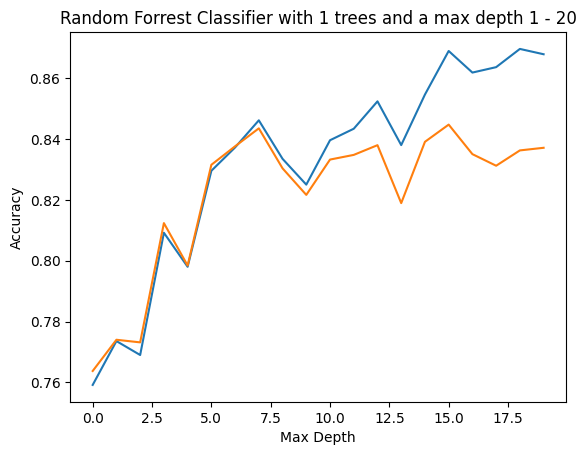

0.8268707697256998


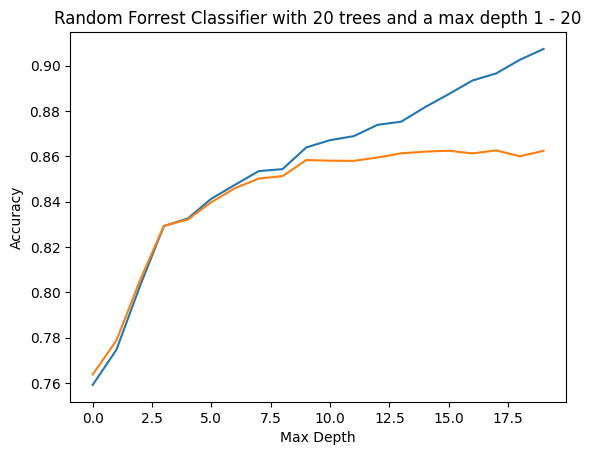

0.8494495994865489


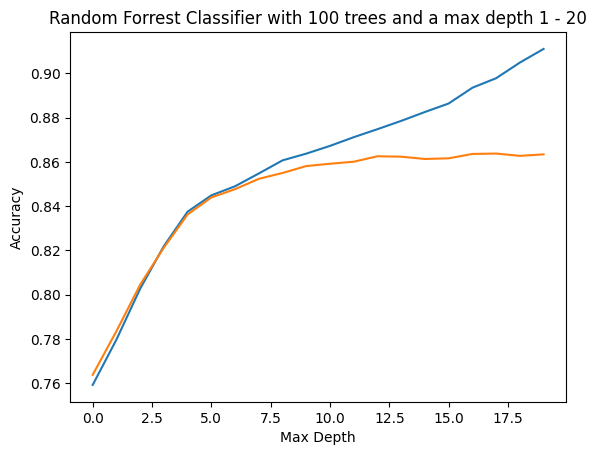

0.8507225769617133


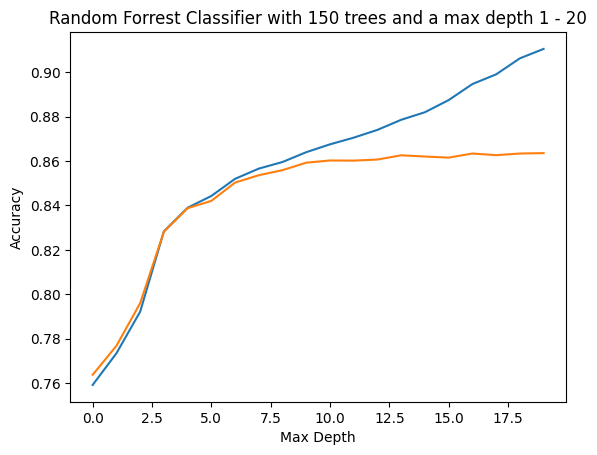

0.8506143198891223


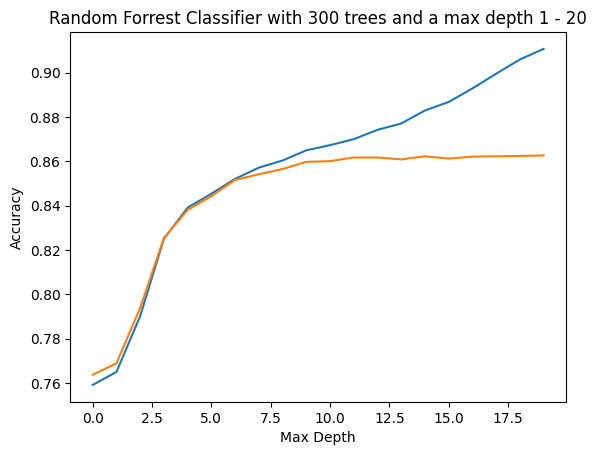

0.8499947222888622


In [10]:
clf_dict = {}
num_trees = [1, 20, 100, 150, 300]
# Test a range of max depth
for j in num_trees:
    clf_dict[j] = []
    for i in range(1, 21):
        clf_model = RandomForestClassifier(n_estimators=j, max_depth=i, n_jobs=-1)
        clf_model.fit(x_train_encoded, y_train)
        train_score = accuracy_score(y_train, clf_model.predict(x_train_encoded))
        test_score = accuracy_score(y_test, clf_model.predict(x_test_encoded))
        clf_dict[j].append((train_score, test_score))
    plt.plot(clf_dict[j])
    plt.title(f"Random Forrest Classifier with {j} trees and a max depth 1 - 20")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.show()
    print(np.mean(clf_dict[j]))
        


When comparing the random forrest classifier with a single tree and a decision tree classifier there is a difference in the performance. The reason for this is that the random forrest will only use a subset of the data for each tree, i.e., the accuracy might differ a lot depending on what features and rows it gets trained on.  However, both the training and test accuarcy for the random forrest and decision tree follow each other neatly until about a depth of 6 where it starts to get overfitted.

When increasing the ensamble in the random forrest the curve as a whole gets smoother, probably because all of the data gets used and averaged across the whole forrest. All of the forrests with estimators > 1 they all increase in accuracy fast up until a depth at around six similarly to the other classifiers which indicates that this is a suitable depth for this particular data set. 

What is interesting about this is that compared to the regressor in task 4 A1, the test accuracy doesn't drop as the model gets overfitted, but generalize rather well even though it plateaus after 86%. And this is true for all ensambles with more than one tree where they all almost equally good for the test data.

As the ensamble grows, the training time increase which makes sense since it trains more decision trees.

In [13]:
sorted([(x, y) for x,y in zip(clf_model.feature_importances_, dv.feature_names_)])[::-1]

[(0.14140475271013653, 'capital-gain'),
 (0.10871237210889084, 'age'),
 (0.092409626001372, 'marital-status=Married-civ-spouse'),
 (0.09028922830287557, 'education-num'),
 (0.07232682020288837, 'hours-per-week'),
 (0.06851368348980817, 'relationship=Husband'),
 (0.04155446875468621, 'capital-loss'),
 (0.03812596510269728, 'marital-status=Never-married'),
 (0.025790155182461052, 'occupation=Exec-managerial'),
 (0.020882417051542514, 'occupation=Prof-specialty'),
 (0.018311600448928, 'education=Bachelors'),
 (0.01720616970207882, 'relationship=Own-child'),
 (0.016857933244915344, 'relationship=Not-in-family'),
 (0.016154808627137664, 'sex=Male'),
 (0.015320420431290423, 'relationship=Wife'),
 (0.011560863768240233, 'sex=Female'),
 (0.011159544592495692, 'education=Masters'),
 (0.010488579794893035, 'education=HS-grad'),
 (0.009996340343244032, 'marital-status=Divorced'),
 (0.008664263601829212, 'occupation=Other-service'),
 (0.008552710272147167, 'workclass=Private'),
 (0.008530491121129